In [1]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
# import plotly.plotly as py
import plotly.offline as py
import plotly.graph_objs as go

from src.utils import db_components

py.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sqlalchemy import select

In [3]:
# Initialize DB engine, tables
db_engine, tables = db_components()

2018-07-19 11:09:39,102 INFO sqlalchemy.engine.base.Engine select version()
2018-07-19 11:09:39,105 INFO sqlalchemy.engine.base.Engine {}
2018-07-19 11:09:39,155 INFO sqlalchemy.engine.base.Engine select current_schema()
2018-07-19 11:09:39,156 INFO sqlalchemy.engine.base.Engine {}
2018-07-19 11:09:39,199 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2018-07-19 11:09:39,200 INFO sqlalchemy.engine.base.Engine {}
2018-07-19 11:09:39,221 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2018-07-19 11:09:39,222 INFO sqlalchemy.engine.base.Engine {}
2018-07-19 11:09:39,262 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2018-07-19 11:09:39,262 INFO sqlalchemy.engine.base.Engine {}
2018-07-19 11:09:39,306 INFO sqlalchemy.engine.base.Engine SELECT c.relname FROM pg_class c JOIN pg_namespace n ON n.oid = c.relnamespace WHERE n.nspname = %(schema)s AND c.relkind = 'r'
2018-07-19 11:

2018-07-19 11:09:39,600 INFO sqlalchemy.engine.base.Engine {'table_name': 'users'}
2018-07-19 11:09:39,624 INFO sqlalchemy.engine.base.Engine 
            SELECT a.attname,
              pg_catalog.format_type(a.atttypid, a.atttypmod),
              (SELECT pg_catalog.pg_get_expr(d.adbin, d.adrelid)
                FROM pg_catalog.pg_attrdef d
               WHERE d.adrelid = a.attrelid AND d.adnum = a.attnum
               AND a.atthasdef)
              AS DEFAULT,
              a.attnotnull, a.attnum, a.attrelid as table_oid,
              pgd.description as comment
            FROM pg_catalog.pg_attribute a
            LEFT JOIN pg_catalog.pg_description pgd ON (
                pgd.objoid = a.attrelid AND pgd.objsubid = a.attnum)
            WHERE a.attrelid = %(table_oid)s
            AND a.attnum > 0 AND NOT a.attisdropped
            ORDER BY a.attnum
        
2018-07-19 11:09:39,625 INFO sqlalchemy.engine.base.Engine {'table_oid': 24896}
2018-07-19 11:09:39,647 INFO sqlalchemy.

In [4]:
for t in tables:
    if t.name == 'users':
        users_table = t
        continue
    if t.name == 'views_follows':
        views_follows_table = t
        continue
#         users_table, views_follows_table = tables

### Get top follows

In [5]:
top_limit = 100  # Top 100 most followed channels
# We only need to query the most recent recors for this
datetime.utcnow(), datetime.utcnow() - timedelta(days=30)

(datetime.datetime(2018, 7, 19, 9, 9, 40, 781037),
 datetime.datetime(2018, 6, 19, 9, 9, 40, 781038))

In [6]:
one_month_ago = datetime.utcnow() - timedelta(days=30)

In [7]:
df_follows = pd.read_sql(
            select(
                [users_table.c.display_name, views_follows_table.c.follows_count, views_follows_table.c.view_count]
            ).where(
                views_follows_table.c.query_tstamp > one_month_ago
            ).order_by(
                views_follows_table.c.query_tstamp.desc()
            ).order_by(
                views_follows_table.c.follows_count.desc()
            ).limit(top_limit).select_from(
                views_follows_table.join(users_table, users_table.c.id==views_follows_table.c.user_id)
            ),
            db_engine,
        )

2018-07-19 11:09:41,517 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2018-07-19 11:09:41,519 INFO sqlalchemy.engine.base.Engine {'name': 'SELECT users.display_name, views_follows.follows_count, views_follows.view_count \nFROM views_follows JOIN users ON users.id = views_follows.user_id  ... (2 characters truncated) ... WHERE views_follows.query_tstamp > %(query_tstamp_1)s ORDER BY views_follows.query_tstamp DESC, views_follows.follows_count DESC \n LIMIT %(param_1)s'}
2018-07-19 11:09:41,581 INFO sqlalchemy.engine.base.Engine SELECT users.display_name, views_follows.follows_count, views_follows.view_count 
FROM views_follows JOIN users ON users.id = views_follows.user_id 
WHERE views_follows.query_tstamp > %(query_tstamp_1)s ORDER BY views_follows.query_tstamp DESC, views_follows.follows_count DESC 
 LIMIT %(param_1)s
2018-07-19 11:09:41,582 INFO sqlalchemy.

In [8]:
df_follows

display_name  follows_count    view_count
0              Ninja        9506792  2.548711e+08
1             shroud        3766984  1.752136e+08
2           summit1g        3240509  2.311431e+08
3         Riot Games        2975189  1.007581e+09
4          Syndicate        2562742  4.632752e+07
5   DrDisRespectLIVE        2514463  8.269178e+07
6           ESL_CSGO        2449172  2.933033e+08
7           imaqtpie        2341479  2.832405e+08
8       TimTheTatman        2335938  8.915912e+07
9         Nightblue3        2259518  1.962926e+08
10             LIRIK        2121623  2.530981e+08
11           dakotaz        2067342  4.751536e+07
12        sodapoppin        2036488  2.236366e+08
13         loltyler1        1743159  7.530260e+07
14          pokimane        1688206  3.688072e+07
15         CDNThe3rd        1468001  2.727109e+07
16         TSM_Dyrus        1456005  2.115195e+08
17            JoshOG        1447357  5.477414e+07
18      TSM_Bjergsen        1442140  9.109341e+07
19        ELEAGUE TV        1429461  1.145977e+08
20              Gosu        1427171  1.033692e+08
21       Castro_1021        1427047  4.628105e+07
22       DreamHackCS        1370463  1.428365e+08
23             Faker        1366921  3.489756e+07
24       PhantomL0rd        1359591           NaN
25            boxbox        1351745  8.179526e+07
26    GamesDoneQuick        1345471  2.020325e+08
27         GoldGlove        1300554  5.361014e+07
28          C9Sneaky        1285946  8.533206e+07
29   CaptainSparklez        1264288  2.147385e+07
..               ...            ...           ...
70        Monstercat         757133  2.213739e+07
71  DisguisedToastHS         747554  3.961324e+07
72          Cryaotic         744418  3.857199e+07
73      GassyMexican         743311  1.947974e+07
74         A_Seagull         741313  2.057848e+07
75           STPeach         740375  1.737676e+07
76           UNLOSTV         736537  2.410922e+07
77             elded         732925  1.301713e+07
78         rewinside         728093  9.006315e+06
79      RocketLeague         723551  5.346117e+07
80           Reckful         714373  9.623141e+07
81          Yogscast         703423  8.565130e+07
82         KayPeaLoL         702867  1.998906e+07
83           Anomaly         700406           NaN
84             wtcNN         696675  3.096291e+07
85          Aphromoo         696365  6.669162e+07
86        DansGaming         688349  9.522426e+07
87   BeyondTheSummit         687796  3.618008e+08
88           Alinity         673556  3.886621e+07
89           Froggen         671348  6.693168e+07
90            hastad         671247  4.063577e+07
91   ProfessorBroman         667106  1.821329e+07
92            Scarra         660452  6.497830e+07
93   PlayHearthstone         651647  1.009693e+08
94          Rainbow6         647341  2.168176e+07
95      LegendaryLea         645594  3.950195e+07
96             nalcs         639042  7.184849e+07
97      Call of Duty         631748  3.321316e+07
98          gafallen         625607  1.669112e+07
99       MOONMOON_OW         622523  3.768024e+07

[100 rows x 3 columns]

Seems faster, but I can't really say...

### Time series query

Instead of pulling down all the data, we would like to get most aggregations
done by the database.

The original query:
```
select(
    [
        views_follows_table.c.query_tstamp,
        users_table.c.display_name,
        views_follows_table.c.follows_count,
        views_follows_table.c.view_count,
    ]
).order_by(
    views_follows_table.c.query_tstamp.desc()
).select_from(
    views_follows_table.join(
        users_table,
        users_table.c.id==views_follows_table.c.user_id
    )
)
```
which produces the following SQL query:
```
SELECT views_follows.query_tstamp, users.display_name, views_follows.follows_count, views_follows.view_count 
FROM views_follows
JOIN users
ON users.id = views_follows.user_id
ORDER BY views_follows.query_tstamp DESC
```
To speed this up, there are a couple easy tricks:
1. Retrieve data from view_follows only for the last X days;
1. Aggregate for the coarser time unit needed (e.g. day)
1. Defere the join with the users table at the very end;

In [9]:
from sqlalchemy import func
# from sqlalchemy.sql import label

In [10]:
time_series_table = select(
    [
        views_follows_table.c.user_id,
        func.date_trunc('day', views_follows_table.c.query_tstamp).label("datetime_day"),
        func.max(views_follows_table.c.follows_count).label("follows"),
        func.max(views_follows_table.c.view_count).label("views"),
    ]
).where(
    views_follows_table.c.query_tstamp > datetime.utcnow() - timedelta(days=60)
).group_by(
    views_follows_table.c.user_id,
    func.date_trunc('day', views_follows_table.c.query_tstamp),
# ).order_by(
#     func.date_trunc('day', views_follows_table.c.query_tstamp).desc()
).alias()

mini_users_table = select([
        users_table.c.id,
        users_table.c.display_name
    ]).alias()

timeseries_query = select([
    time_series_table.c.datetime_day,
    mini_users_table.c.display_name,
    time_series_table.c.views,
    time_series_table.c.follows,
]).select_from(
    time_series_table.join(
        mini_users_table,
        mini_users_table.c.id==time_series_table.c.user_id
    )
).order_by(time_series_table.c.datetime_day)

print(timeseries_query)
# print(time_name_join)
# time_name_join.c.values()

SELECT anon_1.datetime_day, anon_2.display_name, anon_1.views, anon_1.follows 
FROM (SELECT views_follows.user_id AS user_id, date_trunc(%(date_trunc_1)s, views_follows.query_tstamp) AS datetime_day, max(views_follows.follows_count) AS follows, max(views_follows.view_count) AS views 
FROM views_follows 
WHERE views_follows.query_tstamp > %(query_tstamp_1)s GROUP BY views_follows.user_id, date_trunc(%(date_trunc_2)s, views_follows.query_tstamp)) AS anon_1 JOIN (SELECT users.id AS id, users.display_name AS display_name 
FROM users) AS anon_2 ON anon_2.id = anon_1.user_id ORDER BY anon_1.datetime_day


In [11]:
df_time = pd.read_sql(
    timeseries_query,
    db_engine
)

2018-07-19 11:10:16,260 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2018-07-19 11:10:16,262 INFO sqlalchemy.engine.base.Engine {'name': 'SELECT anon_1.datetime_day, anon_2.display_name, anon_1.views, anon_1.follows \nFROM (SELECT views_follows.user_id AS user_id, date_trunc(%(date_trun ... (310 characters truncated) ... _1 JOIN (SELECT users.id AS id, users.display_name AS display_name \nFROM users) AS anon_2 ON anon_2.id = anon_1.user_id ORDER BY anon_1.datetime_day'}
2018-07-19 11:10:16,331 INFO sqlalchemy.engine.base.Engine SELECT anon_1.datetime_day, anon_2.display_name, anon_1.views, anon_1.follows 
FROM (SELECT views_follows.user_id AS user_id, date_trunc(%(date_trunc_1)s, views_follows.query_tstamp) AS datetime_day, max(views_follows.follows_count) AS follows, max(views_follows.view_count) AS views 
FROM views_follows 
WHERE views_follows.query_tstam

In [12]:
df_time.head()

datetime_day   display_name       views  follows
0   2018-05-20          JtgTv  14534331.0   219895
1   2018-05-20         NALCS2  15964837.0   277795
2   2018-05-20      Miss_Rage  18232371.0   354598
3   2018-05-20      DBShushei   3394860.0    20985
4   2018-05-20  fourtwntylive   3415968.0    28782

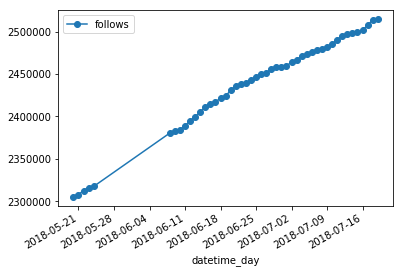

In [34]:
df_time.loc[
    (df_time.display_name == "DrDisRespectLIVE"),
#     (df_time.display_name == "summit1g"),
    ['datetime_day', "follows"]
].set_index('datetime_day').plot(marker='o');

In [14]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94012 entries, 0 to 94011
Data columns (total 4 columns):
datetime_day    94012 non-null datetime64[ns]
display_name    94012 non-null object
views           93049 non-null float64
follows         94012 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.9+ MB


In [35]:
df_dr = df_time.loc[
    df_time.display_name == "DrDisRespectLIVE",
    ["datetime_day", 'views', 'follows']
].set_index('datetime_day').resample('D').last().interpolate()
df_dr.head(20)

views    follows
datetime_day                       
2018-05-20    72202128.0  2304614.0
2018-05-21    72382778.0  2307935.0
2018-05-22    72629998.0  2312711.0
2018-05-23    72777184.0  2315910.0
2018-05-24    72830192.0  2317580.0
2018-05-25    73031184.4  2321772.0
2018-05-26    73232176.8  2325964.0
2018-05-27    73433169.2  2330156.0
2018-05-28    73634161.6  2334348.0
2018-05-29    73835154.0  2338540.0
2018-05-30    74036146.4  2342732.0
2018-05-31    74237138.8  2346924.0
2018-06-01    74438131.2  2351116.0
2018-06-02    74639123.6  2355308.0
2018-06-03    74840116.0  2359500.0
2018-06-04    75041108.4  2363692.0
2018-06-05    75242100.8  2367884.0
2018-06-06    75443093.2  2372076.0
2018-06-07    75644085.6  2376268.0
2018-06-08    75845078.0  2380460.0

/home/guzzo/Software/anaconda3/envs/twitch-dash/lib/python3.6/site-packages/matplotlib/scale.py:114: RuntimeWarning:

invalid value encountered in less_equal



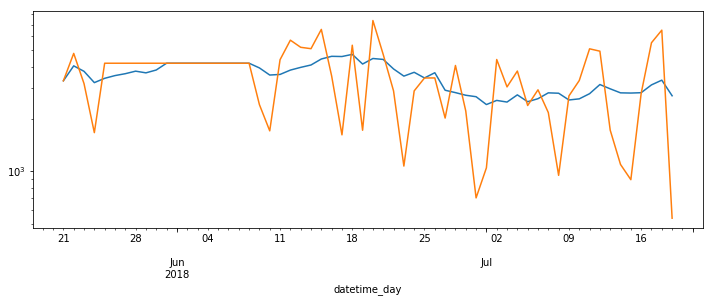

In [36]:
ax = df_dr.diff(
).rolling('7D').mean(
).loc[
    :,
    'follows'
#     'views'
].plot.line(figsize=(12,4))  #.set_index('datetime_day').loc[:, 'views'].diff()
df_dr.diff(
# ).rolling('7D').mean(
).loc[
    :,
    'follows'
#     'views'
].plot.line(ax=ax)
plt.yscale('log')

In [70]:
df_follows = df_time.groupby('display_name').last().sort_values('follows', ascending=False)
df_follows

datetime_day         views  follows
display_name                                         
Ninja               2018-07-19  2.548711e+08  9506792
shroud              2018-07-19  1.752136e+08  3766984
summit1g            2018-07-19  2.311431e+08  3240509
Riot Games          2018-07-19  1.007581e+09  2975220
Syndicate           2018-07-19  4.632752e+07  2562755
DrDisRespectLIVE    2018-07-19  8.269178e+07  2514463
ESL_CSGO            2018-07-19  2.933033e+08  2449177
imaqtpie            2018-07-19  2.832405e+08  2341479
TimTheTatman        2018-07-19  8.915912e+07  2335938
Nightblue3          2018-07-19  1.962926e+08  2259518
LIRIK               2018-07-19  2.530981e+08  2121633
dakotaz             2018-07-19  4.751536e+07  2067342
sodapoppin          2018-07-19  2.236366e+08  2036488
loltyler1           2018-07-19  7.530260e+07  1743159
pokimane            2018-07-19  3.688072e+07  1688206
CDNThe3rd           2018-07-19  2.727109e+07  1468001
TSM_Dyrus           2018-07-19  2.115195e+08  1456031
JoshOG              2018-07-19  5.477414e+07  1447376
TSM_Bjergsen        2018-07-19  9.109341e+07  1442148
ELEAGUE TV          2018-07-19  1.145977e+08  1429489
Gosu                2018-07-19  1.033692e+08  1427172
Castro_1021         2018-07-19  4.628105e+07  1427052
DreamHackCS         2018-07-19  1.428365e+08  1370476
Faker               2018-07-19  3.489756e+07  1366921
PhantomL0rd         2018-07-19           NaN  1359591
boxbox              2018-07-19  8.179526e+07  1351745
GamesDoneQuick      2018-07-19  2.020325e+08  1345480
GoldGlove           2018-07-19  5.361014e+07  1300554
C9Sneaky            2018-07-19  8.533206e+07  1285946
CaptainSparklez     2018-07-19  2.147385e+07  1264290
...                        ...           ...      ...
DB_high             2018-07-19  3.738513e+06     1300
guysfromqueens      2018-07-19  1.169314e+07     1275
CGnetworkTV         2018-07-19  1.856277e+07     1170
bravoian            2018-07-19  4.642159e+06     1136
Vicious_Skittle     2018-07-19  5.778324e+06     1086
mstephano           2018-07-19  7.559816e+06     1039
OtherSense          2018-07-19  3.843610e+06     1027
steven_bonnell_ii   2018-07-19  3.699135e+07      845
SlayerGamingTv      2018-07-19  4.563852e+06      828
jokerx7             2018-07-19  7.416874e+06      799
fifaonlinetv        2018-07-19  1.298068e+07      765
pgl_clean           2018-07-19  2.772886e+08      628
hotbloodedgaming    2018-07-19  9.547112e+06      507
IncredibleOrb       2018-07-19  8.106882e+06      434
wowdotcom           2018-07-19  5.805569e+06      421
TheGamerAccess      2018-07-19  4.242578e+06      415
Kadey1up            2018-07-19  6.313880e+06      399
La2dreams           2018-07-19  1.190304e+07      387
DD_AKT              2018-07-19  4.066595e+06      349
Hatoyatv            2018-07-19  4.857508e+06      325
eleaguetvtest       2018-07-19  2.615886e+08      208
SiliconANGLE        2018-07-19  7.172170e+06      200
lolgameru2          2018-07-19  7.062004e+06      191
officialbjergsen    2018-07-19  6.539775e+06      150
Zeldathon           2018-07-19  3.892202e+06      133
NarcissaWright      2018-07-19  3.044206e+07       64
Jahmillionaire      2018-07-19  6.719720e+06       29
JNasty              2018-07-19  5.397134e+06       23
Avilo               2018-07-19  7.770503e+06       11
兔頭                  2018-07-19  9.242960e+06        6

[2012 rows x 3 columns]

In [126]:
tot_follows = df_time[
    df_time['datetime_day'] >= (df_time['datetime_day'].max() - pd.to_timedelta(30, unit='D'))
].groupby('display_name')['follows'].agg(['first', 'last']).eval('last-first')
max_days = df_time[
    df_time['datetime_day'] >= (df_time['datetime_day'].max() - pd.to_timedelta(30, unit='D'))
].groupby('display_name')['datetime_day'].agg(['min', 'max']).eval('max-min') + pd.to_timedelta("1 day")
trending = (tot_follows / max_days.dt.days).sort_values().tail(20)

In [128]:
max_days.describe()

count                       2009
mean     30 days 20:46:28.252862
std       1 days 17:40:42.586057
min              1 days 00:00:00
25%             31 days 00:00:00
50%             31 days 00:00:00
75%             31 days 00:00:00
max             31 days 00:00:00
dtype: object

In [129]:
trending.name = 'follows_day'
trending.tail()

display_name
pokimane         6803.903226
shroud           7691.354839
TimTheTatman     7842.322581
dakotaz          8433.709677
Ninja           30919.322581
Name: follows_day, dtype: float64

In [121]:
tot_follows['m0E_tv']/30

14318.366666666667

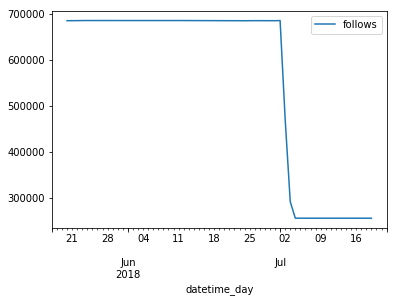

In [123]:
df_time.loc[
    df_time.display_name == "m0E_tv",
    ["datetime_day", 'follows']
].set_index('datetime_day').resample('D').last().interpolate().plot()

In [68]:
df_trending = pd.DataFrame([
    {
        'display_name': name,
        'follows_day': df_time.loc[
            df_time.display_name == name,
            ["datetime_day", 'views', 'follows']
        ].set_index('datetime_day').diff().rolling(
            '30D'
        ).mean().loc[
            :,
            'follows'
            #     'views'
        ].tail(1).values.squeeze().astype(np.int64)
    } for name in df_follows.index[:200]
]).sort_values('follows_day', ascending=False).set_index('display_name')
# df_time.set_index('datetime_day').groupby('display_name').max() # .rolling('7D').mean() #.agg(lambda x: x.diff().rolling('7D').mean())
# .diff().rolling('7D').mean()

In [69]:
df_trending

follows_day
display_name                
Ninja                  31949
dakotaz                 8714
TimTheTatman            8103
shroud                  7947
pokimane                7030
NICKMERCS               6295
Warframe                5599
alanzoka                3954
DrDisRespectLIVE        3025
GamesDoneQuick          2748
KittyPlays              2743
MontanaBlack88          2527
Gotaga                  2369
OPscT                   2313
xQcOW                   1969
loltyler1               1904
CDNThe3rd               1780
C9Sneaky                1676
FACEIT TV               1673
elded                   1616
sodapoppin              1588
amouranth               1577
jukes                   1490
YoDa                    1312
Loserfruit              1284
wtcNN                   1283
Trymacs                 1261
UNLOSTV                 1194
Jahrein                 1183
Riot Games              1097
...                      ...
hastad                     1
GTimeTV                   -1
AmazHS                    -5
Sp4zie                    -5
TrumpSC                   -9
Meteos                   -11
2mgovercsquared          -12
HiRezTV                  -12
RocketLeague             -14
PhantomL0rd              -16
olofmeister              -20
kaceytron                -20
TSM_TheOddOne            -22
aXtLOL                   -22
Bungie                   -26
OMGitsfirefoxx           -27
reynad27                 -30
pashaBiceps              -30
ESL_LOL                  -42
Hiko                     -42
WildTurtle               -44
nickbunyun               -57
nalcs                    -60
TotalBiscuit             -63
SivHD                    -67
MLG                      -69
Twitch                   -72
PGL                      -96
ELEAGUE TV              -131
Anomaly                -7136

[200 rows x 1 columns]

In [54]:
import plotly.offline as py
import plotly.graph_objs as go

In [67]:
trace0 = go.Bar(
    x=df_trending.head(20).iloc[::-1]['follows_day'],
    y=df_trending.head(20).iloc[::-1].index,
#     marker=dict(
#         color='rgba(50, 171, 96, 0.6)',
#         line=dict(
#             color='rgba(50, 171, 96, 1.0)',
#             width=1),
#     ),
    name='Hottest Streamers',
    orientation='h',
)
layout = go.Layout(
    title='Hottest Streamers of the month',
    xaxis=dict(
        type='log',
        autorange=True,
        title='Follows/day'
    ),
#     yaxis=dict(
#         type='log',
#         autorange=True
#     ),
    margin=dict(
        l=115,
        r=35,
        b=35,
        t=35
    ),
)
py.iplot(go.Figure(data=[trace0], layout=layout))

### Get trending from sql directly

Query data from now and from 7 days ago.

In [40]:
weekly_trending_table = select(
    [
        views_follows_table.c.user_id,
        func.date_trunc('day', views_follows_table.c.query_tstamp).label("datetime_day"),
        func.max(views_follows_table.c.follows_count).label("follows"),
        func.max(views_follows_table.c.view_count).label("views"),
    ]
).where(
    (
        views_follows_table.c.query_tstamp == datetime.utcnow() - timedelta(days=7)
    ) | (
        views_follows_table.c.query_tstamp == datetime.utcnow()
    )
).group_by(
    views_follows_table.c.user_id,
    func.date_trunc('day', views_follows_table.c.query_tstamp),
# ).order_by(
#     func.date_trunc('day', views_follows_table.c.query_tstamp).desc()
).alias()

mini_users_table = select([
        users_table.c.id,
        users_table.c.display_name
    ]).alias()

weekly_trending_query = select([
    weekly_trending_table.c.datetime_day,
    mini_users_table.c.display_name,
    weekly_trending_table.c.views,
    weekly_trending_table.c.follows,
]).select_from(
    weekly_trending_table.join(
        mini_users_table,
        mini_users_table.c.id==weekly_trending_table.c.user_id
    )
).order_by(weekly_trending_table.c.datetime_day)

print(weekly_trending_query)
# print(time_name_join)
# time_name_join.c.values()

SELECT anon_1.datetime_day, anon_2.display_name, anon_1.views, anon_1.follows 
FROM (SELECT views_follows.user_id AS user_id, date_trunc(%(date_trunc_1)s, views_follows.query_tstamp) AS datetime_day, max(views_follows.follows_count) AS follows, max(views_follows.view_count) AS views 
FROM views_follows 
WHERE views_follows.query_tstamp = %(query_tstamp_1)s OR views_follows.query_tstamp = %(query_tstamp_2)s GROUP BY views_follows.user_id, date_trunc(%(date_trunc_2)s, views_follows.query_tstamp)) AS anon_1 JOIN (SELECT users.id AS id, users.display_name AS display_name 
FROM users) AS anon_2 ON anon_2.id = anon_1.user_id ORDER BY anon_1.datetime_day


In [41]:
df_wtrending = pd.read_sql(
    weekly_trending_query,
    db_engine
)

2018-07-19 11:19:09,701 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2018-07-19 11:19:09,704 INFO sqlalchemy.engine.base.Engine {'name': 'SELECT anon_1.datetime_day, anon_2.display_name, anon_1.views, anon_1.follows \nFROM (SELECT views_follows.user_id AS user_id, date_trunc(%(date_trun ... (361 characters truncated) ... _1 JOIN (SELECT users.id AS id, users.display_name AS display_name \nFROM users) AS anon_2 ON anon_2.id = anon_1.user_id ORDER BY anon_1.datetime_day'}
2018-07-19 11:19:09,784 INFO sqlalchemy.engine.base.Engine SELECT anon_1.datetime_day, anon_2.display_name, anon_1.views, anon_1.follows 
FROM (SELECT views_follows.user_id AS user_id, date_trunc(%(date_trunc_1)s, views_follows.query_tstamp) AS datetime_day, max(views_follows.follows_count) AS follows, max(views_follows.view_count) AS views 
FROM views_follows 
WHERE views_follows.query_tstam

In [42]:
df_wtrending.head()

Empty DataFrame
Columns: [datetime_day, display_name, views, follows]
Index: []

In [23]:
df_wtrending.loc[
    (df_time.display_name == "DrDisRespectLIVE"),
#     (df_time.display_name == "summit1g"),
    ['datetime_day', "follows"]
].set_index('datetime_day').plot();

TypeError: Empty 'DataFrame': no numeric data to plot